# MLflow Model Grid Search Analysis Notebook

This notebook provides a workflow for analyzing the results of a grid search experiment tracked in MLflow. The main steps are:

1. **Configuration**: Set the `grid_id`, `experiment_name`, and (optionally) `param_set` to specify which MLflow runs to analyze.

2. **Data Retrieval**: Pull all relevant runs from MLflow using the provided identifiers. The resulting DataFrame (`df`) contains run metadata, hyperparameters, and key performance metrics.

3. **Filtering**: Use the `filter_runs` function to select runs that meet specific metric thresholds (e.g., minimum CF ≤ 1 cm, maximum RMSE, etc.). The filtered results are stored in `filtered_df`.

4. **Exploration & Visualization**:
    - Display top and bottom runs by any metric (e.g., RMSE, CF ≤ 2 cm).
    - Visualize how RMSE and CF ≤ 2 cm vary with different hyperparameters (e.g., number of hidden layers, window sizes).
    - Analyze the effect of hidden neuron count on performance metrics.

5. **Interpretation**: Use the summary tables and plots to identify the best-performing hyperparameter combinations and gain insights into model behavior.

**Variables in use**:
- `df`: All runs matching the grid search criteria.
- `filtered_df`: Runs filtered by metric thresholds.
- `top15rmse_df`, `top15cf_df`: Top 15 runs by RMSE and CF ≤ 2 cm, respectively.

**Requirements**:  
- MLflow tracking server access  
- Python packages: pandas, numpy, matplotlib, seaborn, mlflow

**Usage**:  
Modify the configuration section as needed, then run the notebook cells sequentially to analyze your experiment results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from mlflow.tracking import MlflowClient
from datetime import datetime
import os
from IPython.display import Image, display
import seaborn as sns

In [2]:
os.environ['MLFLOW_TRACKING_URI'] = 'https://cbi-chatbot.tamucc.edu/mlflow'

In [3]:
# Only variables you need to change
# Input the grid ID, experiment name, and parameter set name
# This will pull all runs from the model and plot the performance metrics
# The model must be registered in MLflow
# Change to None if you want to pull more runs

grid_id = "b7f857e4"  # Replace with your grid ID
experiment_name = "experiment_EAGLEP_MORGAN"  # Replace with your experiment name
param_set = None # Replace with your parameter set name

In [4]:


def get_runs_by_grid_and_paramset(grid_id, param_set, experiment_name, max_results=1000):

    client = MlflowClient()

    #experiment = client.get_experiment_by_name(experiment_name)
    #if experiment is None:
    #    raise ValueError(f"Experiment '{experiment_name}' not found.")
    #experiment_id = experiment.experiment_id

    ## Build filter string based on inputs
    #filter_string = f"tags.grid_id = '{grid_id}'"
    #if param_set is not None:
    #    filter_string += f" AND tags.param_set_id = '{param_set}'"

    # Search
    runs = client.search_runs(
        experiment_ids=[str(n) for n in range(17,23)],
        #filter_string=filter_string,
        max_results=5000,
    )

    run_data = []
    for run in runs:
        run_data.append({
            "run_id": run.info.run_id,
            "grid_id": run.data.tags.get("grid_id"),
            "param_set": run.data.tags.get("param_set_id"),
            "metric_cf_1cm": run.data.metrics.get("central_frequency_percentage_1cm"),
            "metric_cf_2cm": run.data.metrics.get("central_frequency_percentage_2cm"),
            "metric_cf_5cm": run.data.metrics.get("central_frequency_percentage_5cm"),
            "metric_cf_15cm": run.data.metrics.get("central_frequency_percentage_15cm"),
            "metric_rmse": run.data.metrics.get("root_mean_squared_error"),
            "metric_val_loss": run.data.metrics.get("final_val_loss"),
            "user": run.data.tags.get("mlflow.user"),
            "params_epochs": run.data.params.get("epochs"),
            "params_batch_size": run.data.params.get("batch_size"),
            "params_restored_epoch": run.data.metrics.get("restored_epoch"),
            "params_hidden_layers": run.data.params.get("hidden_layers"),
            "params_activation": run.data.params.get("activation_function"),
            "params_hidden_neurons": run.data.params.get("hidden_neurons"),
            "params_dropout_rate": run.data.params.get("dropout_rate"),
            "params_learning_rate": run.data.params.get("learning_rate"),
            "params_wind_past_window": run.data.params.get('input_feature__wind_past_window_size'),
            "params_wl_future_window": run.data.params.get('input_feature__wl_future_window_size'),
            "params_wl_past_window": run.data.params.get('input_feature__wl_past_window_size'),
        })

    return pd.DataFrame(run_data)

df = get_runs_by_grid_and_paramset(
    grid_id=grid_id,
    experiment_name=experiment_name,
    param_set= param_set)

display(df)

run_id   grid_id param_set  metric_cf_1cm  \
0     4796e423958949d0976018be86ccb6fb  759a2251  6cc9ec28            NaN   
1     887cc240f52f48caa653c6b64651c95c  759a2251  989ef49e            NaN   
2     07539439322e4bc6b22f40fd12ea2431  6ed22da2  25d00509            NaN   
3     d66ac3b2ecf343348672eafd2c78b8ee  6ed22da2  0af66d86            NaN   
4     c662202b84274423bad996589d4aff2e  759a2251  0c3723ef            NaN   
...                                ...       ...       ...            ...   
4995  784ce865c63c4e75b7f7f00bfe7424c5  6ed22da2  a74fba2b       1.005983   
4996  a6ea32cbf23241e1b829d12323149093  759a2251  9236021c      11.822321   
4997  f6bdcd0da9d346019711028f39e4791b  6ed22da2  344aa95b       3.999947   
4998  7438df6fe9fb4362a767c583958130c5  6ed22da2  344aa95b       5.148499   
4999  730dc513f89f43218acfa55421778e2c  759a2251  43667a70       7.217838   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
0               NaN            NaN             NaN          NaN   
1               NaN            NaN             NaN          NaN   
2               NaN            NaN             NaN          NaN   
3               NaN            NaN             NaN          NaN   
4               NaN            NaN             NaN          NaN   
...             ...            ...             ...          ...   
4995       1.999973       5.223115       18.312881     0.331769   
4996      23.209815      52.814664       91.886154     0.082342   
4997       7.933272      20.649958       60.376277     0.179949   
4998      10.374279      25.110925       63.431533     0.185169   
4999      14.545481      36.430318       81.507401     0.115677   

      metric_val_loss    user  ... params_batch_size params_restored_epoch  \
0                 NaN    axie  ...              None                  None   
1                 NaN    axie  ...              None                  None   
2                 NaN  jduff3  ...              4000                  None   
3                 NaN  jduff3  ...              4000                  None   
4                 NaN    axie  ...              None                  None   
...               ...     ...  ...               ...                   ...   
4995         0.245115  jduff3  ...             16000                  None   
4996         0.008368    axie  ...                32                  None   
4997         0.241792  jduff3  ...             16000                  None   
4998         0.469632  jduff3  ...             16000                  None   
4999         0.045183    axie  ...                32                  None   

     params_hidden_layers params_activation params_hidden_neurons  \
0                       1              tanh                   256   
1                       1              tanh                   256   
2                       2              selu                   128   
3                       2              selu                   128   
4                       1              tanh                   256   
...                   ...               ...                   ...   
4995                    2              selu                    32   
4996                    1              selu                    64   
4997                    2              selu                    32   
4998                    2              selu                    32   
4999                    1              selu                    64   

     params_dropout_rate params_learning_rate params_wind_past_window  \
0                    0.1               0.0001                      12   
1                    0.1               0.0001                       6   
2                   0.02                 0.01                       0   
3                   0.02                 0.01                     180   
4                    0.1               0.0001                       1   
...                  ...                  ...                     ...   
4995                0.02 

In [5]:
client = MlflowClient()
runs = client.search_runs(
    experiment_ids=[str(n) for n in range(17,23)],
    max_results=100,
)

In [6]:
client.search_experiments()[0]

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1753974920558, experiment_id='23', last_update_time=1753974920558, lifecycle_stage='active', name='experiment_PTLAVA_PTOCON', tags={}>

In [7]:
runs

[<Run: data=<RunData: metrics={}, params={'activation_function': 'tanh',
  'batch_size': 'None',
  'data_path_testing': '/work/CBI-WL-NeuralNet/data/model_inputs/REALPN_SPICGS/less_clean_coarse_v1/featureset_5/test',
  'data_path_training': '/work/CBI-WL-NeuralNet/data/model_inputs/REALPN_SPICGS/less_clean_coarse_v1/featureset_5/train',
  'data_path_validation': '/work/CBI-WL-NeuralNet/data/model_inputs/REALPN_SPICGS/less_clean_coarse_v1/featureset_5/validate',
  'dropout_rate': '0.1',
  'early_stopping_patience': '50',
  'epochs': '2000',
  'hidden_layers': '1',
  'hidden_neurons': '256',
  'input_feature__do_hourly_average_on_wind': 'True',
  'input_feature__end_dates': "['2013-05-18 00:00', '2011-04-29 00:00', "
                              "'2025-07-24 00:00']",
  'input_feature__num_features': '192',
  'input_feature__start_dates': "['2012-05-18 00:00', '2010-04-29 00:00', "
                                "'2024-07-24 00:00']",
  'input_feature__wind_past_window_size': '6',
  'i

In [8]:
import hyperparameter_plot as hp

In [27]:
converted_df = df.dropna(subset=['metric_cf_1cm']).query("not params_hidden_neurons.str.contains('\\\\[')").assign(params_batch_size=lambda df: df['params_batch_size'].str.replace('None', '-999')).apply(hp.convert_col).convert_dtypes()
converted_df

run_id   grid_id param_set  metric_cf_1cm  \
23    efa2332141c4446abe52df25f9b206a6  6ed22da2  bde5f283       0.074221   
40    b5d4021635df4c658d181e86ccbcc18f  759a2251  2ec3294f       10.52639   
43    9f2fb4da71d44cd3928db0f03235d538  6ed22da2  22bea241       0.130283   
45    d4cf5935eb8f4bd580475413a1876472  759a2251  6c609d61       9.213596   
50    a6f41c2d6d6e43f7a7601ca3ce14bbea  6ed22da2  225d0596       2.169226   
...                                ...       ...       ...            ...   
4995  784ce865c63c4e75b7f7f00bfe7424c5  6ed22da2  a74fba2b       1.005983   
4996  a6ea32cbf23241e1b829d12323149093  759a2251  9236021c      11.822321   
4997  f6bdcd0da9d346019711028f39e4791b  6ed22da2  344aa95b       3.999947   
4998  7438df6fe9fb4362a767c583958130c5  6ed22da2  344aa95b       5.148499   
4999  730dc513f89f43218acfa55421778e2c  759a2251  43667a70       7.217838   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
23         0.166357       0.531064         2.73594     0.537094   
40        21.400713      49.812004        90.73066     0.086879   
43         0.247172       0.638021        2.991635     0.514304   
45        18.621383      45.606952       89.573758     0.090994   
50         4.170098      10.177559       30.026404     0.279072   
...             ...            ...             ...          ...   
4995       1.999973       5.223115       18.312881     0.331769   
4996      23.209815      52.814664       91.886154     0.082342   
4997       7.933272      20.649958       60.376277     0.179949   
4998      10.374279      25.110925       63.431533     0.185169   
4999      14.545481      36.430318       81.507401     0.115677   

      metric_val_loss    user  ...  params_batch_size  params_restored_epoch  \
23           0.661977  jduff3  ...               4000                   <NA>   
40           0.007934    axie  ...                 32                   <NA>   
43           0.669045  jduff3  ...               4000                   <NA>   
45           0.007679    axie  ...                 32                   <NA>   
50           2.361127  jduff3  ...               4000                   <NA>   
...               ...     ...  ...                ...                    ...   
4995         0.245115  jduff3  ...              16000                   <NA>   
4996         0.008368    axie  ...                 32                   <NA>   
4997         0.241792  jduff3  ...              16000                   <NA>   
4998         0.469632  jduff3  ...              16000                   <NA>   
4999         0.045183    axie  ...                 32                   <NA>   

      params_hidden_layers  params_activation params_hidden_neurons  \
23                       2               selu                   128   
40                       1               tanh                   256   
43                       2               selu                   128   
45                       1               tanh                   256   
50                       2               selu                   128   
...                    ...                ...                   ...   
4995                     2               selu                    32   
4996                     1               selu                    64   
4997                     2               selu                    32   
4998                     2               selu                    32   
4999                     1               selu                    64   

      params_dropout_rate  params_learning_rate  params_wind_past_window  \
23                   0.02                  0.01                      180   
40                    0.1                0.0001                        1   
43                   0.02                  0.01                      180   
45                    0.1                0.0001                        6   
50                   0.02                  0.01                        0   
...                   ...       

In [28]:
converted_df.dtypes

run_id                     string[python]
grid_id                    string[python]
param_set                  string[python]
metric_cf_1cm                     Float64
metric_cf_2cm                     Float64
metric_cf_5cm                     Float64
metric_cf_15cm                    Float64
metric_rmse                       Float64
metric_val_loss                   Float64
user                       string[python]
params_epochs                       Int64
params_batch_size                   Int64
params_restored_epoch               Int64
params_hidden_layers                Int64
params_activation          string[python]
params_hidden_neurons               Int64
params_dropout_rate               Float64
params_learning_rate              Float64
params_wind_past_window             Int64
params_wl_future_window             Int64
params_wl_past_window               Int64
dtype: object

In [29]:
converted_df['params_batch_size'].unique()

<IntegerArray>
[4000, 32, -999, 16000]
Length: 4, dtype: Int64

In [12]:
converted_df.query('params_learning_rate < 0.01')

run_id   grid_id param_set  metric_cf_1cm  \
40    b5d4021635df4c658d181e86ccbcc18f  759a2251  2ec3294f       10.52639   
45    d4cf5935eb8f4bd580475413a1876472  759a2251  6c609d61       9.213596   
64    a33a439c0ee24ebfa88fc4fefbe49f7b  759a2251  00c9c604       8.535596   
65    3d04525703cb410eadcee0893e83c1fc  759a2251  d3aef4c8       6.523437   
73    d3b04a02f42849839bf69a36057e7c23  759a2251  45904e2c       5.877772   
...                                ...       ...       ...            ...   
4849  588b2541f1ff43feba94385391128fd2  759a2251  0ef68ca9       9.322434   
4850  d3eaafd738e246d09d0f34eff77b0586  759a2251  34622e78      10.613357   
4853  16b9ec48720945fb9875c483dd28beeb  759a2251  78218180       9.902837   
4854  c6ba09699999488ebc6877c09e6ab779  759a2251  b6a71f20      10.638684   
4857  a8a0a7cd2b4e4af697e0aaf766bf8d29  759a2251  986e02e9       9.677419   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
40        21.400713      49.812004        90.73066     0.086879   
45        18.621383      45.606952       89.573758     0.090994   
64        16.960936      40.250831       82.264215     0.113757   
65        13.118846      31.918901       77.507925     0.126872   
73        12.284543      31.394648       72.421495     0.148125   
...             ...            ...             ...          ...   
4849      18.887675      45.549216       91.130805     0.088123   
4850      21.404773      50.656253        92.73468     0.081803   
4853      19.834175      45.573261       90.251328     0.090516   
4854      21.151704      49.099624       91.202228      0.08659   
4857       18.89623      43.982381         90.4612     0.090237   

      metric_val_loss  user  ...  params_batch_size params_restored_epoch  \
40           0.007934  axie  ...                 32                  <NA>   
45           0.007679  axie  ...                 32                  <NA>   
64           0.018332  axie  ...                 32                  <NA>   
65           0.015385  axie  ...                 32                  <NA>   
73           0.015117  axie  ...                 32                  <NA>   
...               ...   ...  ...                ...                   ...   
4849         0.005483  axie  ...                 32                  <NA>   
4850         0.005345  axie  ...                 32                  <NA>   
4853         0.005624  axie  ...                 32                  <NA>   
4854          0.00543  axie  ...                 32                  <NA>   
4857         0.005796  axie  ...                 32                  <NA>   

      params_hidden_layers  params_activation params_hidden_neurons  \
40                       1               tanh                   256   
45                       1               tanh                   256   
64                       1               tanh                   256   
65                       1               tanh                   256   
73                       1               tanh                   256   
...                    ...                ...                   ...   
4849                     1               selu                    64   
4850                     1               selu                    64   
4853                     1               selu                    64   
4854                     1               selu                    64   
4857                     1               selu                    64   

      params_dropout_rate  params_learning_rate  params_wind_past_window  \
40                    0.1                0.0001                        1   
45                    0.1                0.0001                        6   
64                    0.1                0.0001                        6   
65                    0.1                0.0001                        1   
73                    0.1                0.0001                       12   
...                   ...                   ...                     

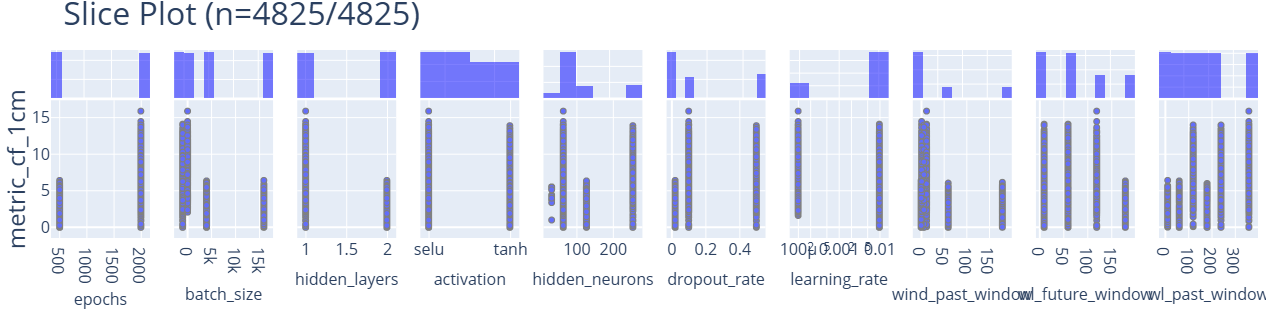

In [30]:
hp.mk_slice_plot(converted_df, target='metric_cf_1cm').update_layout(width=1500)

C:\Users\bcolburn\git\shiny-octo-spork\src\hyperparameter_plot.py:131: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



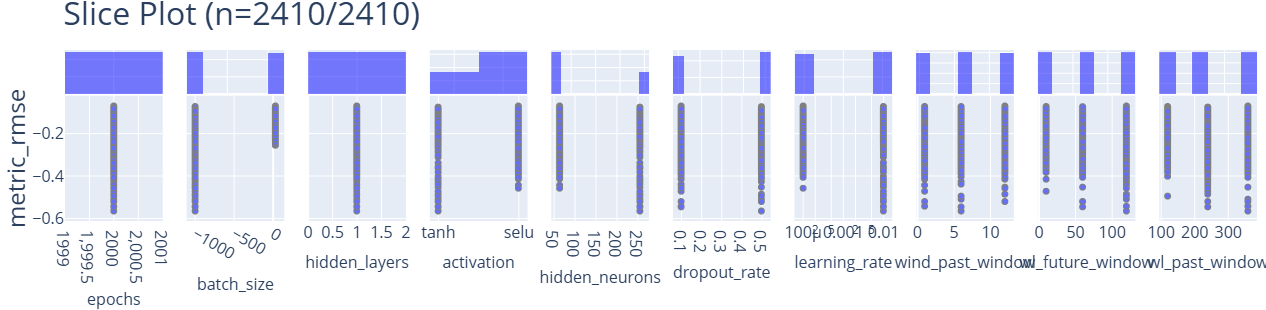

In [31]:
hp.mk_slice_plot(converted_df.query('params_batch_size in [32, -999]'), target='metric_rmse', invert=True).update_layout(width=1500)

C:\Users\bcolburn\git\shiny-octo-spork\src\hyperparameter_plot.py:131: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



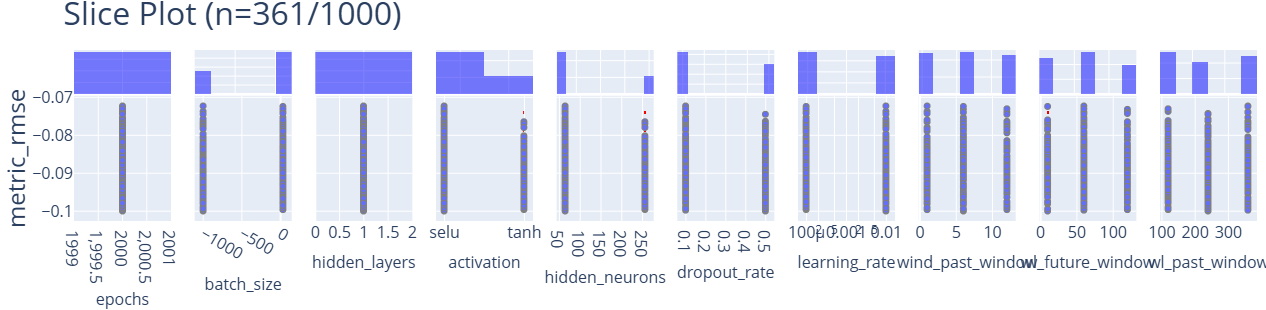

In [32]:
hp.mk_slice_plot(converted_df.query('params_batch_size in [32, -999]').sample(n=1000), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

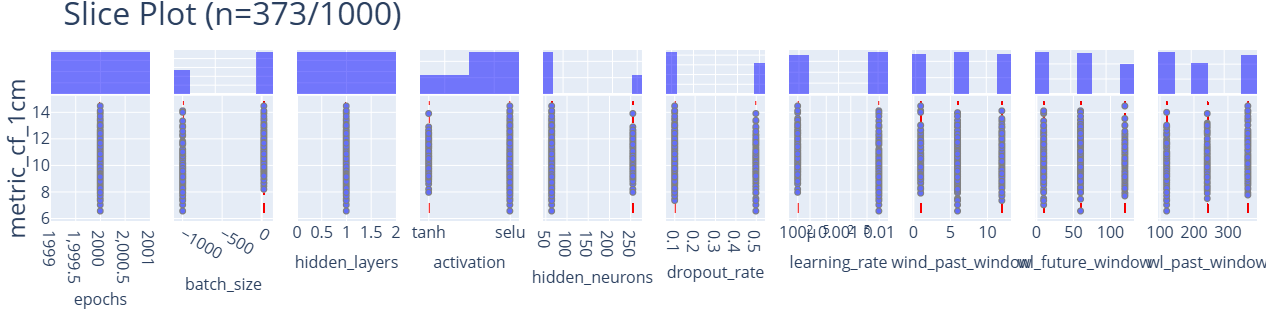

In [34]:
hp.mk_slice_plot(converted_df.query('params_batch_size in [32, -999]').sample(n=1000), target='metric_cf_1cm', filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

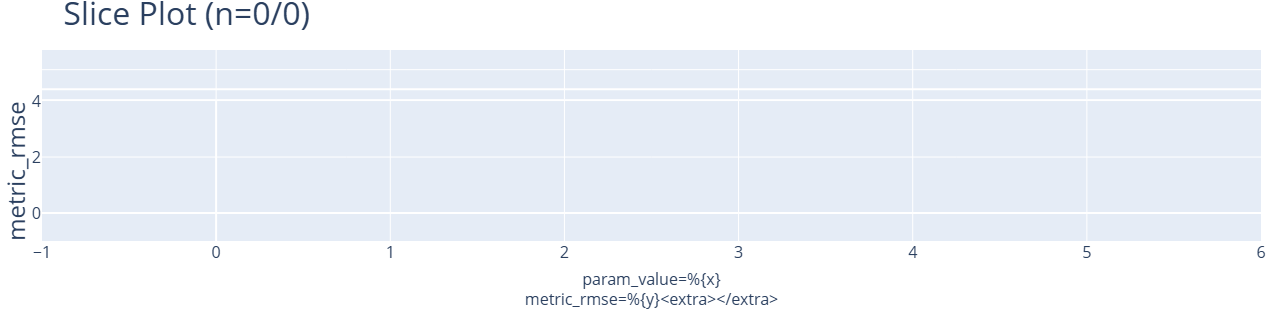

In [17]:
hp.mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

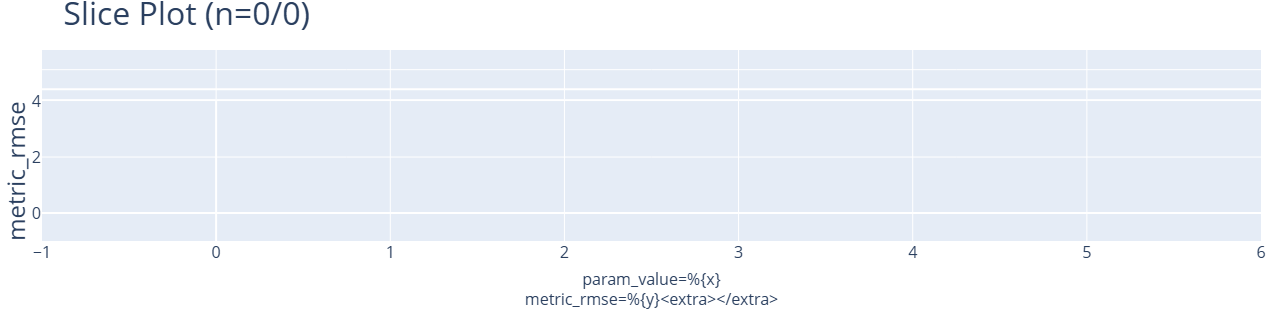

In [18]:
hp.mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

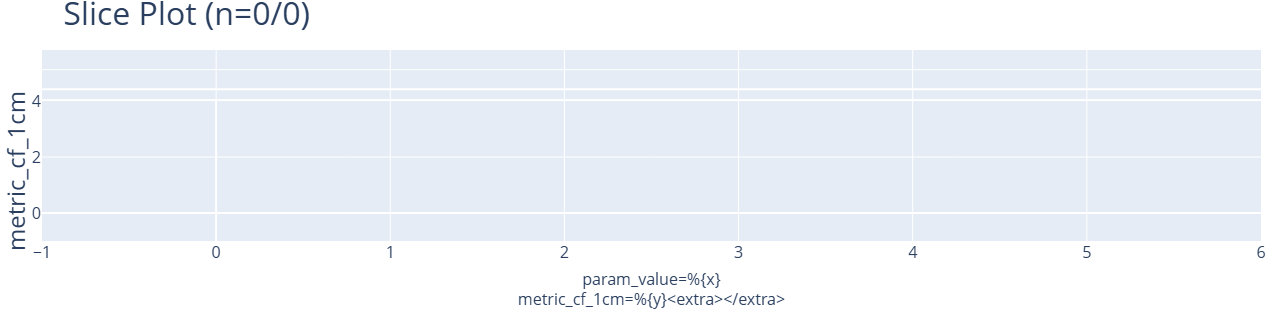

In [19]:
hp.mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_cf_1cm', filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

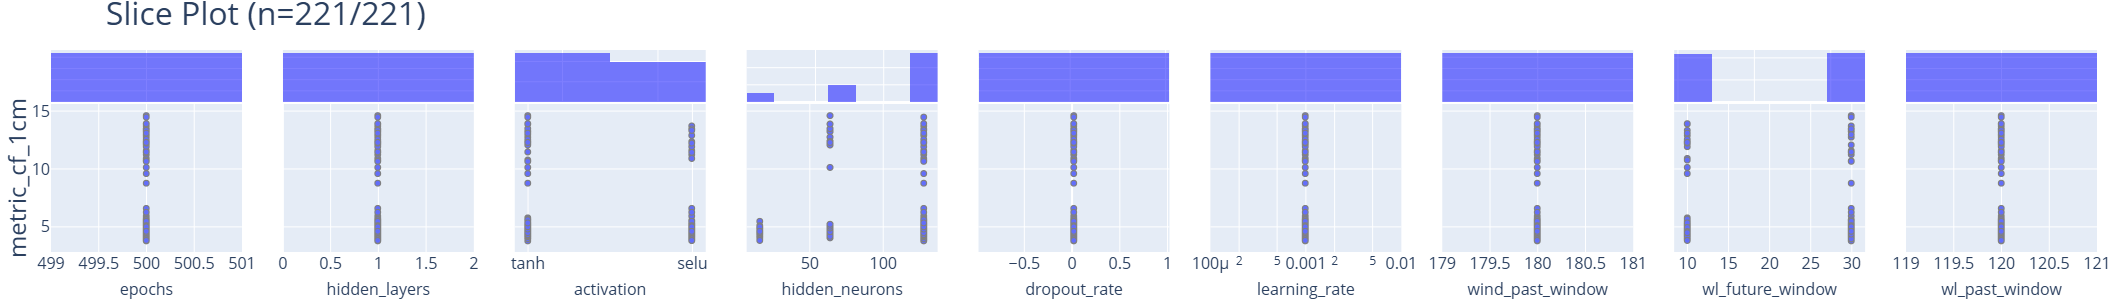

In [17]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_wind_past_window == 180'), target='metric_cf_1cm').update_layout(width=1500)

In [14]:
from IPython.display import Image

In [15]:
Image(data=mk_slice_plot(converted_df, target='metric_cf_1cm', filter=lambda df: df.query('metric_cf_1cm > 10')).update_layout(width=1500).to_image(format='png', scale=0.25))

KeyboardInterrupt: 

In [1]:
mk_slice_plot(df, target='metric_cf_1cm', filter=lambda df: df.query('metric_cf_1cm > 20')).update_layout(width=1500)

NameError: name 'mk_slice_plot' is not defined

In [7]:
# Function to filter runs based on specific criteria
# If you want to filter runs based on specific criteria, you can define the filter below
# For example, you can filter runs based on a specific metric or parameter value

def filter_runs(df, rmse=None, cf_1=None, cf_2=None, cf_5=None, cf_15=None, val_loss=None):
    """
    Filter the runs DataFrame based on threshold criteria. Pass any combination of:
    - rmse, cf_1cm, cf_2cm, cf_5cm, cf_15cm, val_loss
    """
    if rmse is not None:
        df = df[df["rmse"] <= rmse]
    if cf_1 is not None:
        df = df[df["cf_1cm"] >= cf_1]
    if cf_2 is not None:
        df = df[df["cf_2cm"] >= cf_2]
    if cf_5 is not None:
        df = df[df["cf_5cm"] >= cf_5]
    if cf_15 is not None:
        df = df[df["cf_15cm"] >= cf_15]
    if val_loss is not None:
        df = df[df["val_loss"] <= val_loss]
    return df


rmse = None
cf_1 = 10
cf_2 = None
cf_5 = None
cf_15 = None
val_losss = None


filtered_df = filter_runs(df, rmse=rmse, cf_1=cf_1, cf_2=cf_2, cf_5=cf_5, cf_15=cf_15, val_loss=val_losss)
display(filtered_df)

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
18              120             60  
23               60             60  
34               60             60

In [8]:
def display_top_bottom_runs(df, sort_by="rmse", top_n=50):
    """
    Display top and bottom N runs based on a selected metric.
    
    Parameters:
        df (pd.DataFrame): Run data.
        sort_by (str): Column name to sort by.
        top_n (int): Number of runs to display from top and bottom.
    """
    if sort_by not in df.columns:
        raise ValueError(f"Metric '{sort_by}' not found in DataFrame.")

    df_sorted = df.dropna(subset=[sort_by]).sort_values(by=sort_by)

    print(f"Top {top_n} runs by lowest {sort_by}:")
    display(df_sorted.head(top_n))

    print(f"\n Bottom {top_n} runs by highest {sort_by}:")
    display(df_sorted.tail(top_n))


# Display top and bottom runs based on RMSE
# You can change the `sort_by` parameter to "val_loss" or any other metric you want to analyze

display_top_bottom_runs(filtered_df, sort_by="cf_2cm")


Top 50 runs by lowest cf_2cm:


run_id   grid_id param_set     cf_1cm  \
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
34             1  leaky_relu             32         0.02                0   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
10             1  leaky_relu            128         0.02                6   

   wl_future_window wl_past_window  
34               60             60  
18              120             60  
23               60             60  
10               60             60


 Bottom 50 runs by highest cf_2cm:


run_id   grid_id param_set     cf_1cm  \
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
34             1  leaky_relu             32         0.02                0   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
10             1  leaky_relu            128         0.02                6   

   wl_future_window wl_past_window  
34               60             60  
18              120             60  
23               60             60  
10               60             60

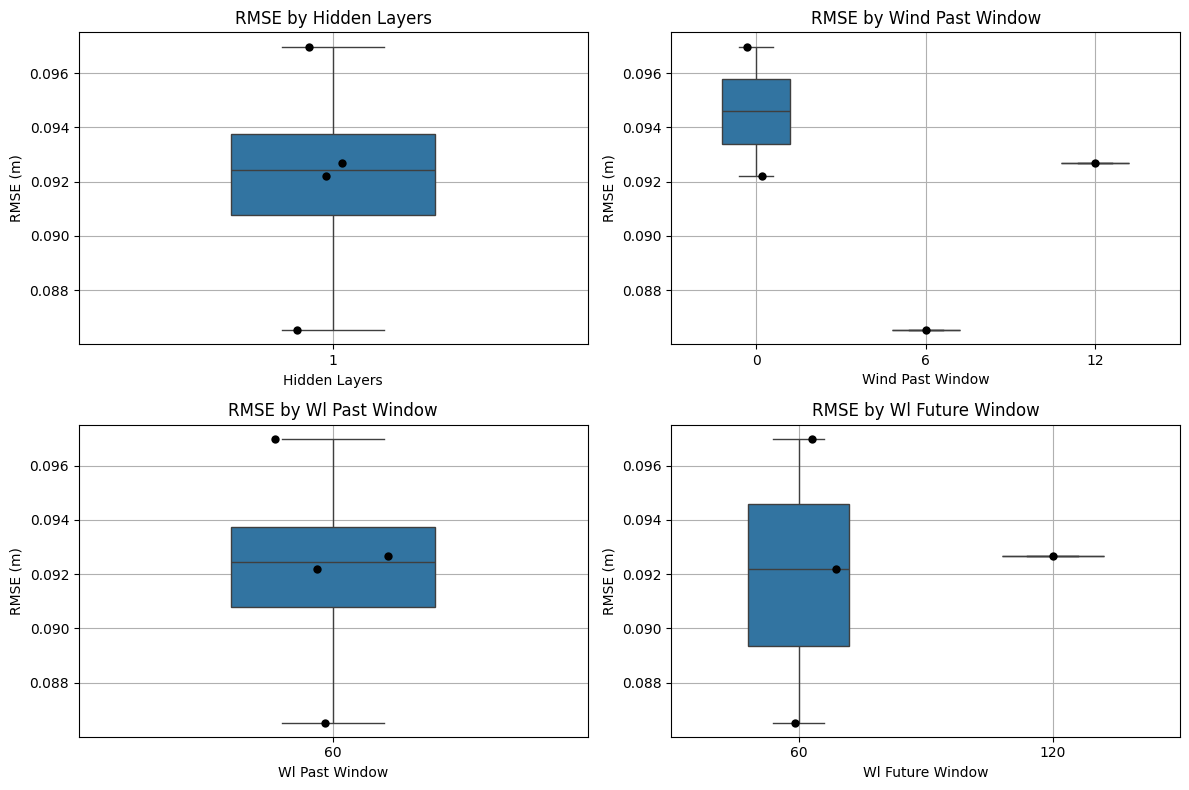

In [9]:
def plot_rmse_by_multiple_params_grid(df, param_cols, suptitle=None):
    num_plots = len(param_cols)
    ncols = 2
    nrows = (num_plots + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
    for i, param_col in enumerate(param_cols):
        ax = axes.flat[i]

        plot_df = df.copy()

        # Ensure column is numeric
        plot_df[param_col] = pd.to_numeric(plot_df[param_col], errors='coerce')

        # Get sorted unique values
        sorted_vals = sorted(plot_df[param_col].dropna().unique())

        # Convert to ordered categorical (prevents x-axis stretching)
        plot_df["param_group"] = pd.Categorical(
            plot_df[param_col],
            categories=sorted_vals,
            ordered=True
        )

        sns.boxplot(x="param_group", y="rmse", data=plot_df, width=0.4, ax=ax)
        sns.stripplot(x="param_group", y="rmse", data=plot_df, color="black", jitter=0.15, size=6, ax=ax)

        ax.set_title(f"RMSE by {param_col.replace('_', ' ').title()}")
        ax.set_xlabel(param_col.replace("_", " ").title())
        ax.set_ylabel("RMSE (m)")
        ax.grid(True)




    # Remove unused subplots
    for j in range(i + 1, len(axes.flat)):
        fig.delaxes(axes.flat[j])

    if suptitle:
        fig.suptitle(suptitle, fontsize=16, y=1.02)

    fig.tight_layout()
    plt.show()


# Plot RMSE by multiple parameters
# You can adjust the parameters you want to analyze


plot_rmse_by_multiple_params_grid(filtered_df, [
    "hidden_layers",
    "wind_past_window",
    "wl_past_window",
    "wl_future_window"
])

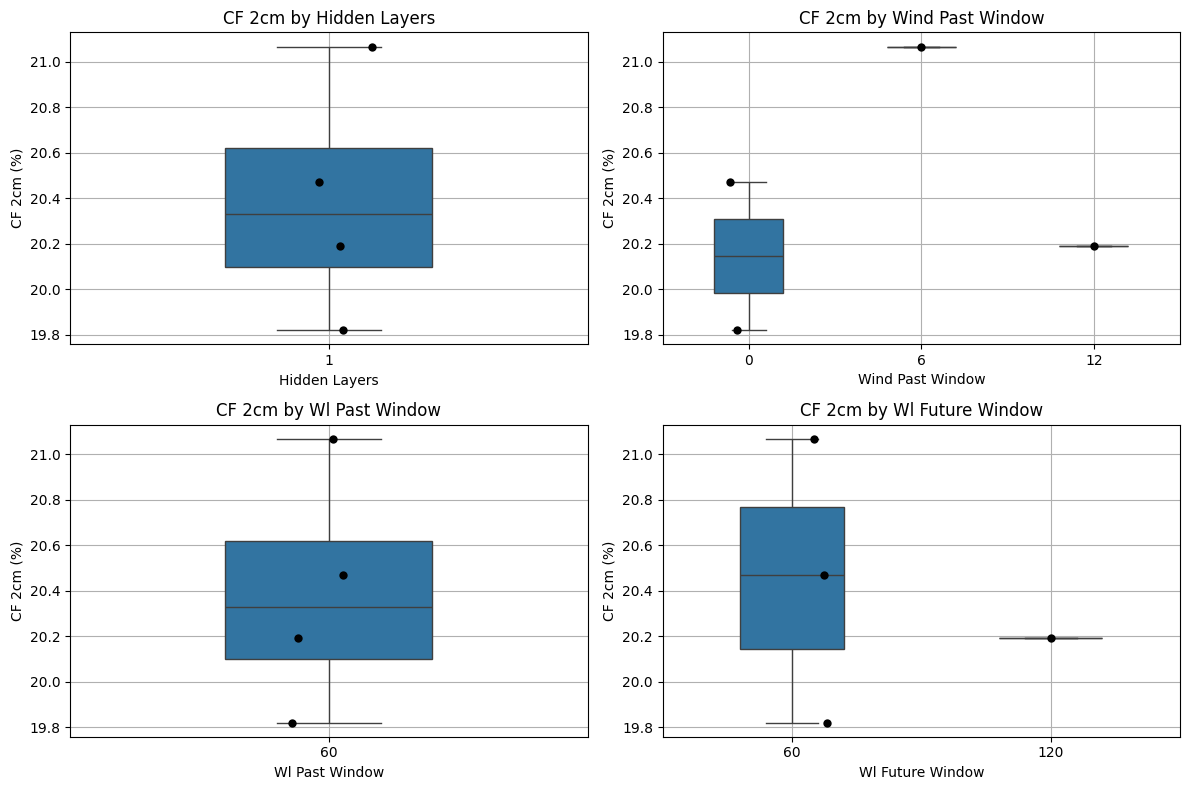

In [10]:
def plot_cf2cm_by_multiple_params_grid(df, param_cols, suptitle=None):
    num_plots = len(param_cols)
    ncols = 2
    nrows = (num_plots + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
    for i, param_col in enumerate(param_cols):
        ax = axes.flat[i]

        plot_df = df.copy()

        # Ensure column is numeric
        plot_df[param_col] = pd.to_numeric(plot_df[param_col], errors='coerce')

        # Get sorted unique values
        sorted_vals = sorted(plot_df[param_col].dropna().unique())

        # Convert to ordered categorical (prevents x-axis stretching)
        plot_df["param_group"] = pd.Categorical(
            plot_df[param_col],
            categories=sorted_vals,
            ordered=True
        )

        sns.boxplot(x="param_group", y="cf_2cm", data=plot_df, width=0.4, ax=ax)
        sns.stripplot(x="param_group", y="cf_2cm", data=plot_df, color="black", jitter=0.15, size=6, ax=ax)

        ax.set_title(f"CF 2cm by {param_col.replace('_', ' ').title()}")
        ax.set_xlabel(param_col.replace("_", " ").title())
        ax.set_ylabel("CF 2cm (%)")
        ax.grid(True)




    # Remove unused subplots
    for j in range(i + 1, len(axes.flat)):
        fig.delaxes(axes.flat[j])

    if suptitle:
        fig.suptitle(suptitle, fontsize=16, y=1.02)

    fig.tight_layout()
    plt.show()


plot_cf2cm_by_multiple_params_grid(filtered_df, [
    "hidden_layers",
    "wind_past_window",
    "wl_past_window",
    "wl_future_window"
])

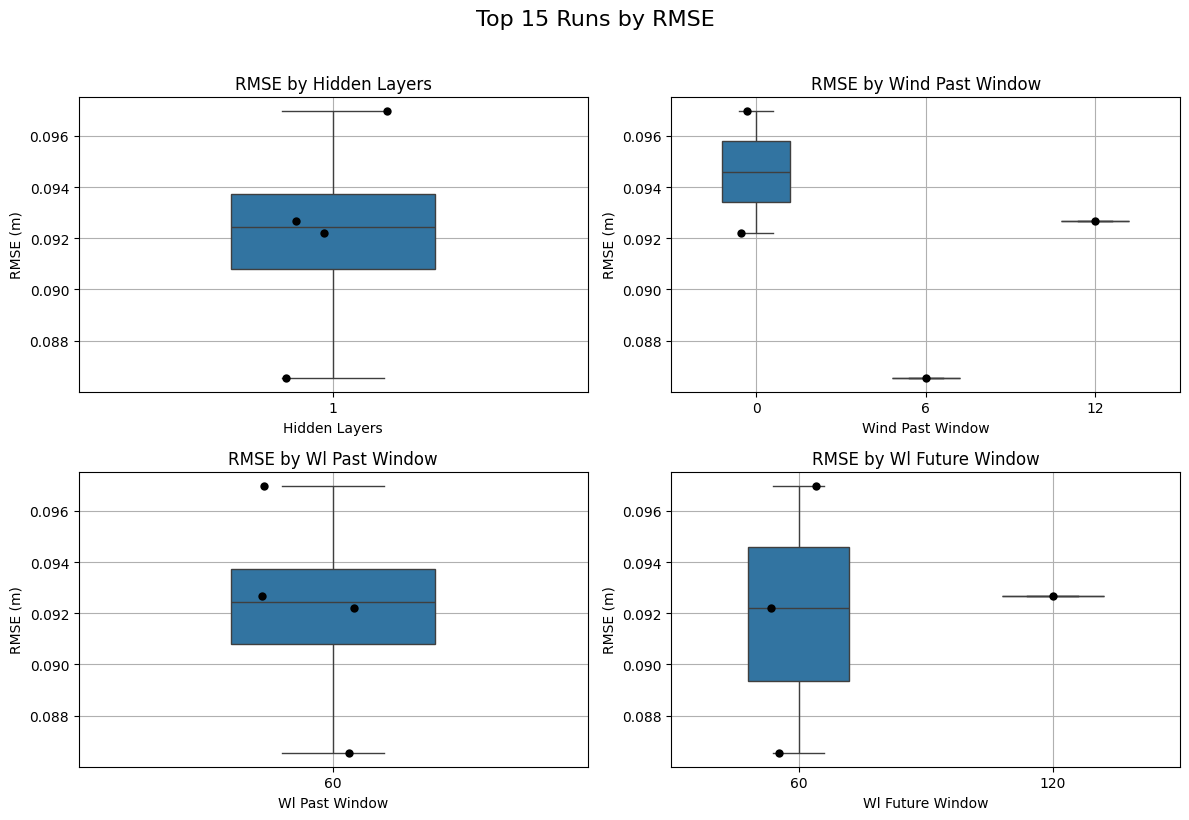

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
23             1  leaky_relu             64         0.02                0   
18             1  leaky_relu             64         0.02               12   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
23               60             60  
18              120             60  
34               60             60

In [11]:
top15rmse_df = filtered_df.sort_values("rmse").dropna(subset=["rmse"]).head(15)

plot_rmse_by_multiple_params_grid(
    top15rmse_df,
    param_cols=[
        "hidden_layers",
        "wind_past_window",
        "wl_past_window",
        "wl_future_window"
    ],
    suptitle="Top 15 Runs by RMSE"
)
display(top15rmse_df)


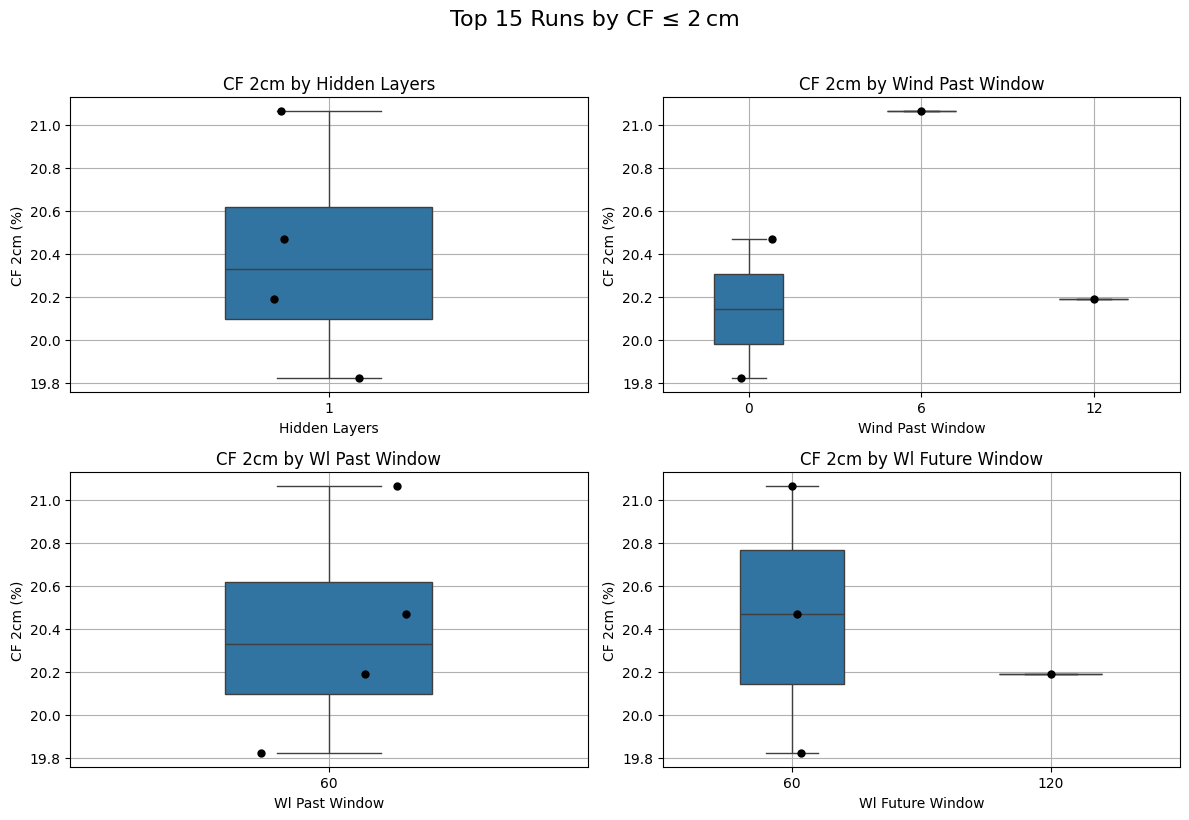

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
23             1  leaky_relu             64         0.02                0   
18             1  leaky_relu             64         0.02               12   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
23               60             60  
18              120             60  
34               60             60

In [12]:
top15cf_df = filtered_df.sort_values("cf_2cm", ascending=False).dropna(subset=["cf_2cm"]).head(15)

plot_cf2cm_by_multiple_params_grid(
    top15cf_df,
    param_cols=[
        "hidden_layers",
        "wind_past_window",
        "wl_past_window",
        "wl_future_window"
    ],
    suptitle="Top 15 Runs by CF ≤ 2 cm"
)
display(top15cf_df)



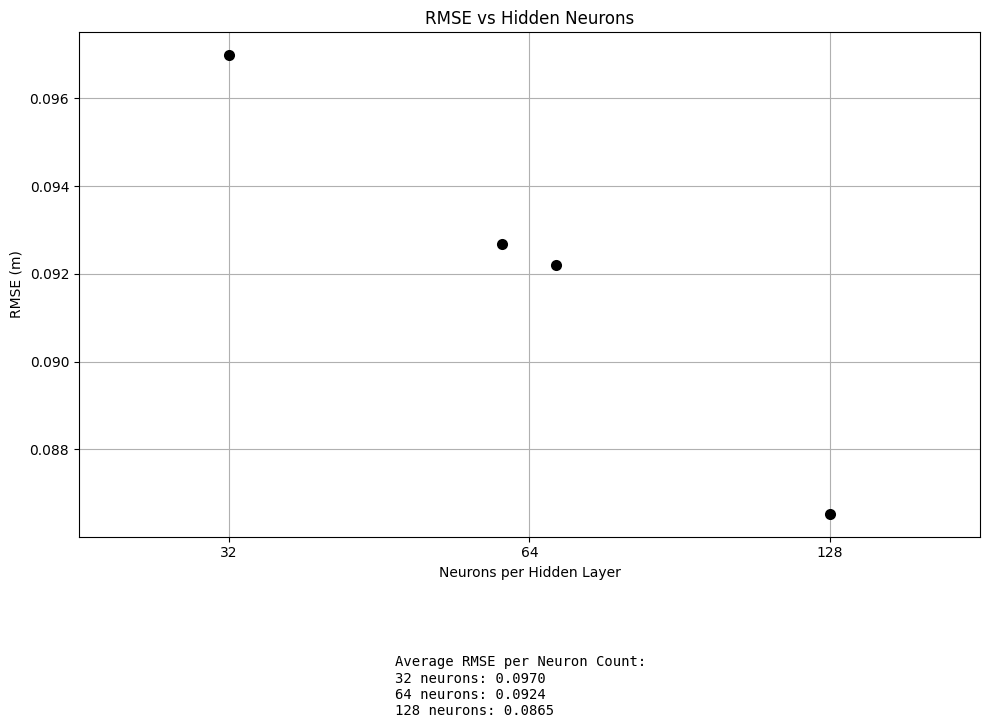

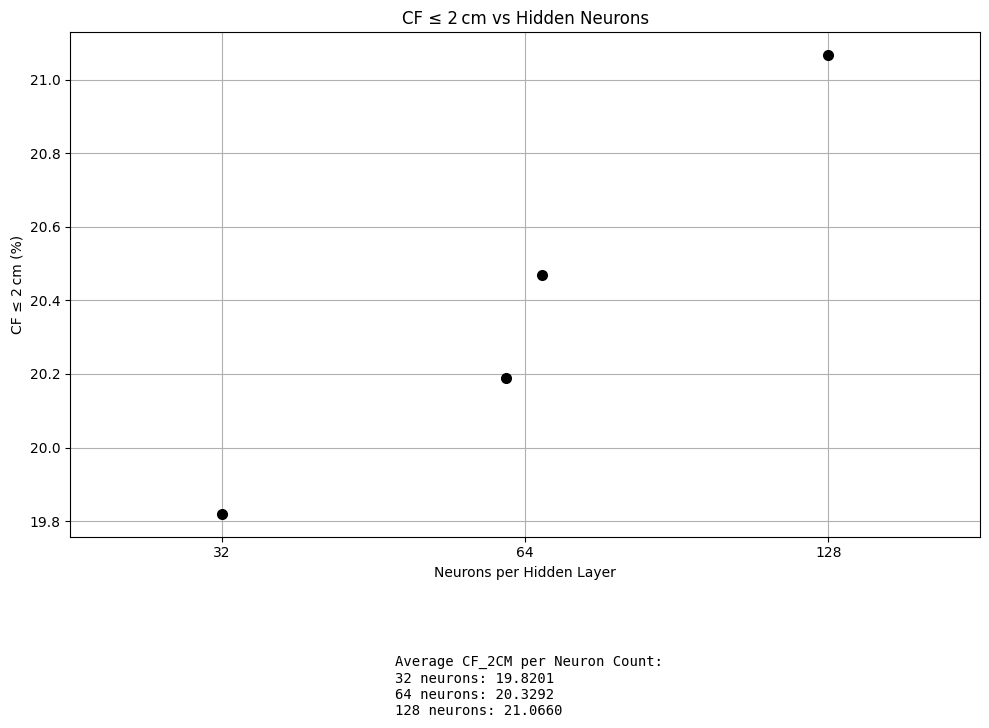

In [13]:
# Function to plot RMSE or CF ≤ 2 cm against hidden neurons
# Allows for easy comparison of how performance metrics change with neuron count
# and architecture (single vs multiple hidden layers)
# Uses seaborn for better aesthetics and matplotlib for custom text annotations

def plot_neurons_vs_metric(df, metric_col="rmse", title="RMSE vs Hidden Neurons"):
    plot_df = df.copy()

    # Ensure numeric type
    plot_df["hidden_neurons"] = pd.to_numeric(plot_df["hidden_neurons"], errors="coerce")

    # Create ordered categorical for clean plotting
    sorted_neurons = sorted(plot_df["hidden_neurons"].dropna().unique())
    plot_df["hidden_neurons_cat"] = pd.Categorical(
        plot_df["hidden_neurons"], categories=sorted_neurons, ordered=True
    )

    # Compute average per neuron count
    avg_by_neurons = (
        plot_df.groupby("hidden_neurons")[metric_col]
        .mean()
        .sort_index()
    )

    # Format summary
    summary_text = "\n".join(
        f"{int(k)} neurons: {v:.4f}" for k, v in avg_by_neurons.items()
    )

    # Plot
    plt.figure(figsize=(10, 6))
    sns.stripplot(
        x="hidden_neurons_cat", y=metric_col,
        data=plot_df, jitter=True, size=8, color="black"
    )

    plt.title(title)
    plt.xlabel("Neurons per Hidden Layer")
    plt.ylabel("RMSE (m)" if metric_col == "rmse" else "CF ≤ 2 cm (%)")
    plt.grid(True)
    plt.tight_layout()

    # Add summary text below plot
    plt.gcf().text(
        0.4, -0.2,
        f"Average {metric_col.upper()} per Neuron Count:\n{summary_text}",
        fontsize=10, family="monospace"
    )

    plt.show()




plot_neurons_vs_metric(filtered_df, metric_col="rmse", title="RMSE vs Hidden Neurons")
plot_neurons_vs_metric(filtered_df, metric_col="cf_2cm", title="CF ≤ 2 cm vs Hidden Neurons")